In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:\\Users\AmirHussain\Desktop\machine-Learning-tradert-bot-main\Datas\data.csv")
df['Date'] = pd.to_datetime(df['Date'])
# df.set_index('Date', drop=True, inplace = True)

In [3]:
df.head(
    
)

,index,Date,Open,High,Low,Close,z_btm,z_top,Slope,ho diff,...,ma 1,ma 2,rsi,mom,atr,Open-pivot,macd,buy,sell,signal
0,36,2019-02-19 07:15:00,1323.70,1324.10,1323.50,1323.60,1323.5,1324.64,-0.175333,0.40,...,1324.457692,1324.787619,34.310139,-2.56,0.547799,-0.03,-0.607987,0,0,2.0
1,37,2019-02-19 07:30:00,1323.70,1324.28,1323.60,1324.18,1323.5,1324.62,-0.181333,0.58,...,1324.360769,1324.665714,34.310139,-2.56,0.558523,-0.32,-0.611465,0,0,2.0
2,38,2019-02-19 07:45:00,1324.21,1324.31,1323.79,1323.93,1323.5,1323.80,-0.146970,0.10,...,1324.296923,1324.580476,41.208584,-1.79,0.555411,0.20,-0.566537,0,0,2.0
3,39,2019-02-19 08:00:00,1323.93,1323.98,1323.40,1323.48,1323.5,1324.21,-0.094303,0.05,...,1324.256154,1324.489524,38.856291,-1.91,0.557390,0.31,-0.547217,0,0,2.0
4,40,2019-02-19 08:15:00,1323.48,1323.80,1323.22,1323.69,1323.7,1324.21,-0.071030,0.32,...,1324.155385,1324.403810,35.442250,-1.80,0.559203,-0.09,-0.561742,0,0,2.0


In [18]:
import joblib


def Standarlizer(array :  np.ndarray ) -> np.ndarray:
    # Load the mean and std from saved files
    scaler = joblib.load('C:\\Users\AmirHussain\Desktop\machine-Learning-tradert-bot-main\Models\scaler.pkl')
    mean = np.load('C:\\Users\AmirHussain\Desktop\machine-Learning-tradert-bot-main\Models\mean.npy')
    std = np.load('C:\\Users\AmirHussain\Desktop\machine-Learning-tradert-bot-main\Models\std.npy')
    scaler.mean_ = mean
    scaler.scale_ = std
    # Apply the scaling transformation to your new data

    array_scaled = scaler.transform(array)
    # print(array_scaled)
    return array_scaled

class what:
    def __init__(self) -> None:
        pass
    def seting(self, stat):
        if  stat ==1:
            return "buy"
        elif  stat == -1 :
            return "sell"
        else:
            return "hold"
        

from tensorflow.keras.models import load_model
def predictor(Input: np.ndarray) -> str:    
    nn_model_name = "C:\\Users\AmirHussain\Desktop\machine-Learning-tradert-bot-main\Models\MLPClassifier  84.22%.h5"

    model = joblib.load(nn_model_name)
    
    pr = round(model.predict(Input)[0])

    return pr

In [32]:
data = pd.read_csv("data.csv")

Input_ = data[['Open', 'pivot', 'ma 1' ,'ma 2']].to_numpy()
Input = Standarlizer(Input_)

df['prediction'] = 0
 
for i in df.index[:2001]:
  x = predictor(Input[i].reshape(1, -1) )
  if x == 1:
    df.loc[i,'prediction' ] = 1
  elif x == 2:
    df.loc[i,'prediction' ] = 2

[[-2.09650086 -2.09636114 -2.09670881 -2.09298858]
 [-2.09650086 -2.09485176 -2.09657869 -2.09355588]
 [-2.09384652 -2.09490381 -2.09565488 -2.09385254]
 ...
 [ 1.1367946   1.13943126  1.14000061  1.13704775]
 [ 1.13950099  1.14172135  1.13924594  1.13779201]
 [ 1.14345647  1.14697815  1.14069022  1.13838013]]
[-2.09650086 -2.09636114 -2.09670881 -2.09298858]


In [33]:
df["prediction"].unique()

array([-1,  1,  0], dtype=int64)

In [39]:
from backtesting import Strategy
from backtesting import Backtest

def SIGNAL():
    return df['prediction']

class myStrategy(Strategy):
    def init(self):
        super().init()
        self.signal1 = self.I(SIGNAL)

    
    def next(self):
        super().next()
        if self.signal1 == 1:
            sl1 = self.data.Low[-1] - 2
            tp1 = self.data.High[-1] + 2
            self.buy(sl=sl1, tp=tp1)
        
        if self.signal1 == 2:
            sl1 = self.data.High[-1] + 2
            tp1 = self.data.Low[-1] - 2
            self.sell(sl=sl1, tp=tp1)



bt = Backtest(df, myStrategy,cash=10_000, commission= 0.001,hedging= True, margin= 1)
bt.run()



Start                                     0.0
End                                  100006.0
Duration                             100006.0
Exposure Time [%]                    1.212915
Equity Final [$]                   9432.20263
Equity Peak [$]                   10069.62571
Return [%]                          -5.677974
Buy & Hold Return [%]               47.109399
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]                     NaN
Sharpe Ratio                              NaN
Sortino Ratio                             NaN
Calmar Ratio                              0.0
Max. Drawdown [%]                    -6.73474
Avg. Drawdown [%]                   -0.522597
Max. Drawdown Duration                99893.0
Avg. Drawdown Duration            6664.533333
# Trades                                 73.0
Win Rate [%]                        61.643836
Best Trade [%]                       0.161566
Worst Trade [%]                     -0.455236
Avg. Trade [%]                    

In [28]:
bt.plot()

GridPlot(id='p1454', ...)

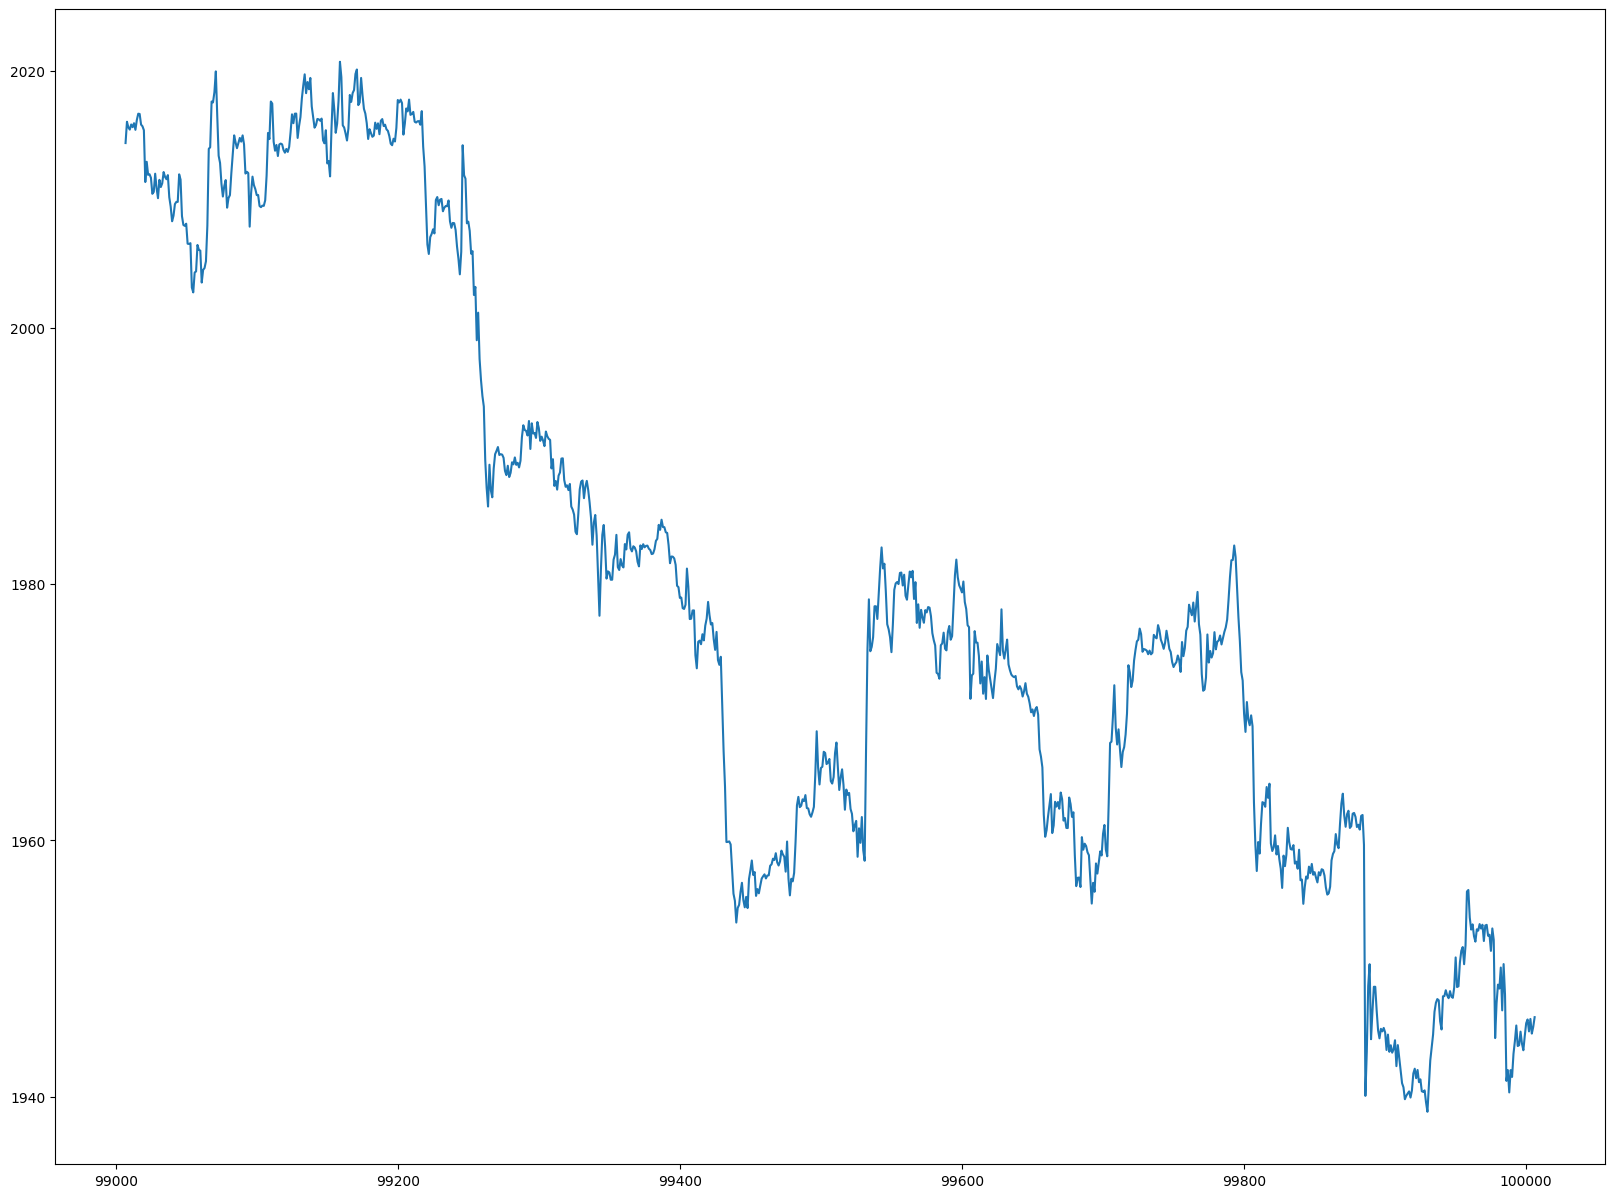

In [31]:
x = df.index                   [ -1000: ]
Open = df['Open']              [ -1000: ]
signal =  df['prediction']     [ -1000: ]



fig = plt.figure(figsize=(20,15))

plt.plot(Open, label = "Open")


for i in x:
    if signal[i] == 1:
        plt.scatter(i, Open[i], c = 'green')
    if signal[i] ==- 1:
        plt.scatter(i, Open[i], c = 'red')